# **Regularized regressions**





In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [34]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_data = pd.read_csv(url, names=column_names, sep=' ', skipinitialspace=True,
                       comment='\t', na_values='?')
                       
raw_data.info() # use this to verify the number of missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [35]:
raw_data = raw_data.dropna() # remove missing values
raw_data['Origin'].replace({1:'USA', 2:'Europe',3:'Japan'}, inplace=True)
raw_data.head()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


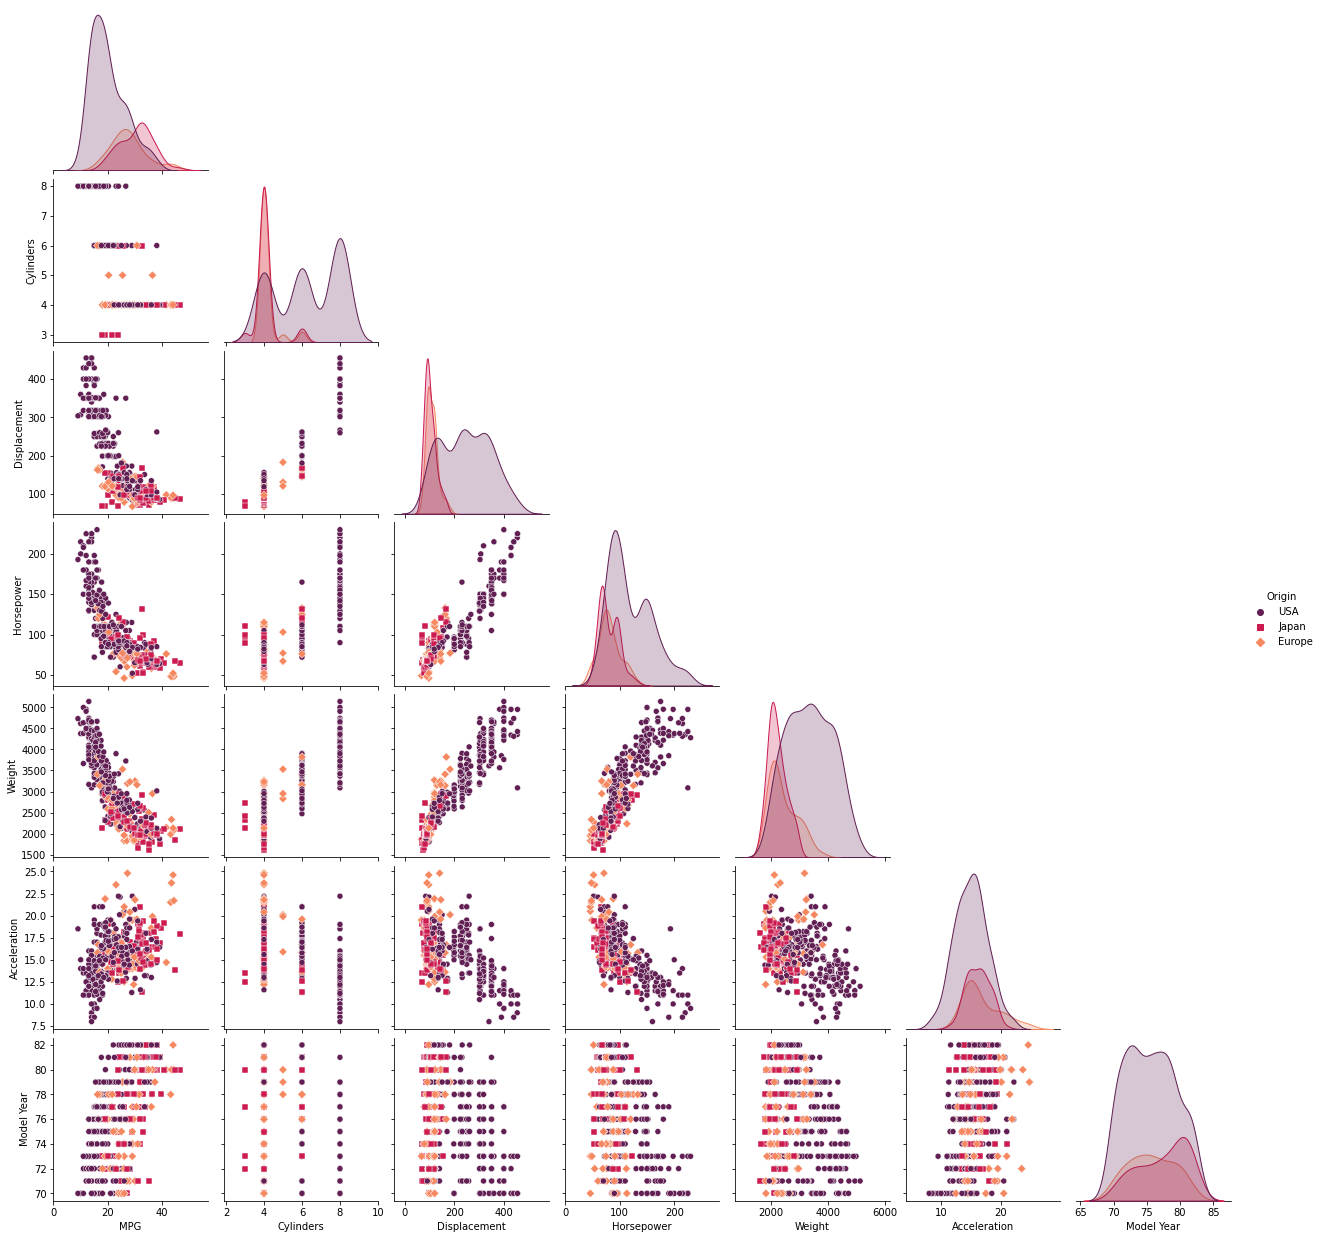

In [36]:
sns.pairplot(raw_data, hue='Origin', markers=["o", "s", "D"], corner=True, palette='rocket')

In [37]:
x = raw_data[['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year']]
y = raw_data[['MPG']].values
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x.values)

**Linear Regression**

In [38]:
LR = LinearRegression()
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
scores = cross_val_score(LR, x_scaled, y, scoring='r2', cv=cv)
print(scores)
print('Mean R square: {}, standard deviation: {}'.format(np.mean(scores), np.std(scores)))

[0.79423491 0.7937095  0.81613437 0.76894584 0.83164463]
Mean R square: 0.8009338467085373, standard deviation: 0.021421987164891344


**Lasso regression (l1 norm)**

Lasso (Least absolute shrinkage selector operator) regression is the regularized form of linear regression. Regularization is done by adding a penalty. You may wonder why we need regularization or a penalty. Sometimes our dataset has features that really do not contribute a lot to our problem of interest, Lasso helps in eliminating these kinds of features by ensuring that the penalty sends them to zero. In scikit-learn the penalty term is controlled by the parameter ***alpha***. Have a look at this brilliant video from [Statquest](https://www.youtube.com/watch?v=NGf0voTMlcs). 

In [39]:
lasso = Lasso(alpha=0.1)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
scores = cross_val_score(lasso, x_scaled, y, scoring='r2', cv=cv)
print(scores)
print('Mean R square: {}, standard deviation: {}'.format(np.mean(scores), np.std(scores)))

[0.79691953 0.7949829  0.81589203 0.77075713 0.84377503]
Mean R square: 0.804465323466397, standard deviation: 0.024326611812804644


**Ridge regression**

Ridge regression, also known as Tikhonov regression or the l2 norm is another form of regularised regression. It aslo uses a penalty term like Lasso, but unlike Lasso, it does not eliminate features by sending them to zero. Have a look at this video from [Statquest](https://www.youtube.com/watch?v=Q81RR3yKn30&t=839s)

In [40]:
ridge = Ridge(alpha=0.9)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
scores = cross_val_score(ridge, x_scaled, y, scoring='r2', cv=cv)
print(scores)
print('Mean R square: {}, standard deviation: {}'.format(np.mean(scores), np.std(scores)))

[0.79361898 0.79419976 0.81554851 0.76860278 0.83389489]
Mean R square: 0.801172984332369, standard deviation: 0.022108307697103088


**Yout turn !!!**

**Exercises**

1.) There is a third regularizetion method which combines Lasso and ridge. Find out which method this is and implement it using scikit-learn

2.) See if you can improve Lasso and ridge by changing *alpha*. What is the best mean absolute error you get?

3.) Lasso has limitations and these limitations are reduced/solved using the method you found in question 2 above. What is/are these limitations?
